In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# create a path to read in data files
ct_data = 'clinicaltrial_data.csv'
mice_data = 'mouse_drug_data.csv'

# read in clinical trial csv file
ct_df = pd.read_csv(ct_data)
# ct_df.head()

# read in mouse drug data csv file
mice_df = pd.read_csv(mice_data)
# mice_df.head()

# need to merge the two csv files based on the common element of "Mouse ID"
ctm_merge_table = pd.merge(ct_df, mice_df, on="Mouse ID")
ctm_merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# group table by drug and timepoint and find the average tumor size

tumor_response = ctm_merge_table.groupby(['Drug', 'Timepoint']).mean()
tumor_response.drop('Metastatic Sites', 1)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# use Capomulin and its timepoint as the index
capo_response = ctm_merge_table.groupby(['Drug','Timepoint']).mean()
# capo_response.index
capo_response.groupby(['Drug']).get_group(('Capomulin')).drop('Metastatic Sites', 1)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [4]:
# merge the two original files together by mouse ID and narrow table to the 4 drugs of interest (aka the Big Four)
bigfour_df = pd.merge(ct_df, mice_df, on="Mouse ID")
bigfour_df = bigfour_df[(bigfour_df["Drug"] == 'Capomulin') |
                       (bigfour_df["Drug"] == 'Infubinol') |
                       (bigfour_df["Drug"] == 'Ketapril') |
                       (bigfour_df["Drug"] == 'Placebo')]

# calculation for avgerage tumor size
avg_tumor = pd.DataFrame(bigfour_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
sem_tumor = pd.DataFrame(bigfour_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
# format the dataframe 
avg_tumor = avg_tumor.unstack(level = 0)
avg_tumor.columns = avg_tumor.columns.get_level_values(1)
avg_tumor


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [5]:
# calculations for standard error of the mean for big four and format the table
sem_tumor = sem_tumor.unstack(level = 0)
sem_tumor.columns = sem_tumor.columns.get_level_values(1)
sem_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


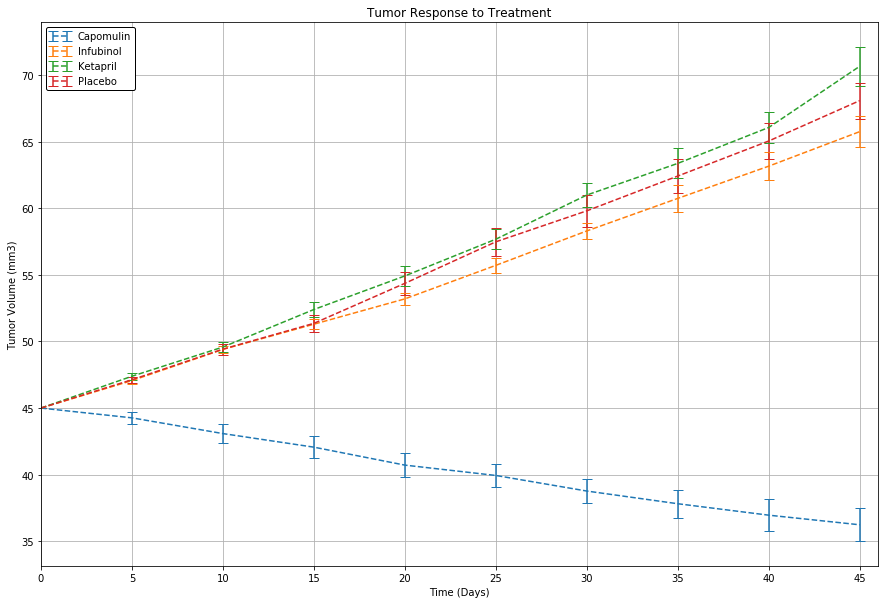

In [6]:
# configure the line chart 
# help(plt.figure)
plt.figure(figsize = (15, 10))
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.xticks(np.arange(0, avg_tumor.index.max()+3 , 5))
plt.xlim(0, avg_tumor.index.max() + 1) 
x = avg_tumor.index

# plot each tumor average with sem
counter = 0 
for tumor in avg_tumor.columns:
    plt.errorbar(x, avg_tumor[tumor], sem_tumor[tumor], linestyle = '--', capsize = 5)
    counter += 1
    
plt.grid()
# legend
plt.legend(numpoints = 2, 
          frameon = True,
          edgecolor = 'black', 
          framealpha = 1)
    

In [7]:
# capomulin with metastatic sites 
capo_response = ctm_merge_table.groupby(['Drug','Timepoint']).mean()
# capo_response.index
capo_response.groupby(['Drug']).get_group(('Capomulin')).drop('Tumor Volume (mm3)', 1)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [8]:
#  table for the big four with metastatic sites and find the mean and sem
bigfour_df = pd.merge(ct_df, mice_df, on="Mouse ID")
bigfour_df = bigfour_df[(bigfour_df["Drug"] == 'Capomulin') |
                       (bigfour_df["Drug"] == 'Infubinol') |
                       (bigfour_df["Drug"] == 'Ketapril') |
                       (bigfour_df["Drug"] == 'Placebo')]

avg_ms = pd.DataFrame(bigfour_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
sem_ms = pd.DataFrame(bigfour_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
avg_ms = avg_ms.unstack(level = 0)
avg_ms.columns = avg_ms.columns.get_level_values(1)
avg_ms

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [9]:
sem_ms = sem_ms.unstack(level = 0)
sem_ms.columns = sem_ms.columns.get_level_values(1)
sem_ms

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


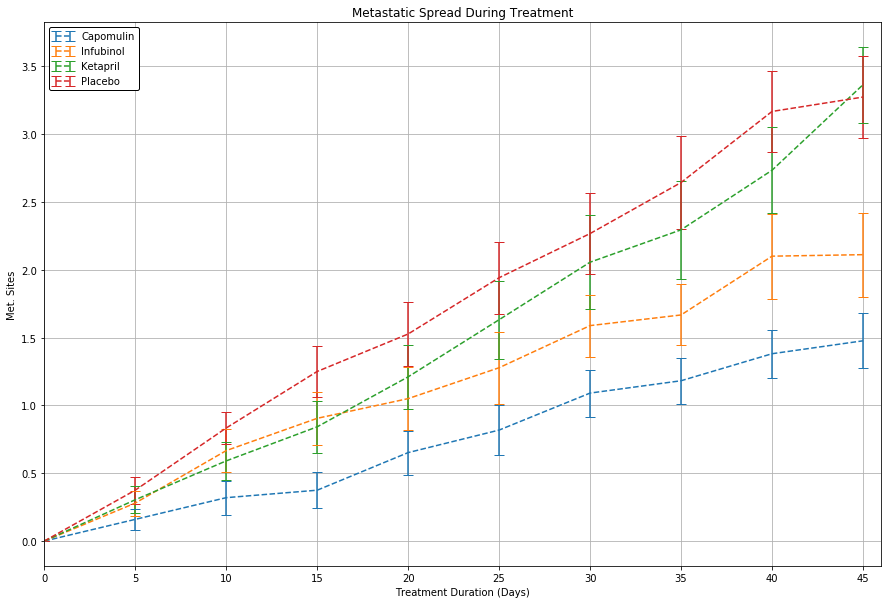

In [10]:
# configure the chart
plt.figure(figsize = (15, 10))
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.xticks(np.arange(0, avg_ms.index.max()+3 , 5))
plt.xlim(0, avg_ms.index.max() + 1) 
x = avg_ms.index


counter = 0 
for ms in avg_ms.columns:
    plt.errorbar(x, avg_ms[ms], sem_ms[ms], linestyle = '--', capsize = 5)
    counter += 1
    
plt.grid()

plt.legend(numpoints = 2, 
          frameon = True,
          edgecolor = 'black', 
          framealpha = 1)

In [11]:
# mouse count for the big four
mice_c_bigfour = bigfour_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_c_bigfour = mice_c_bigfour.unstack(level = 0)
mice_c_bigfour

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [12]:
# mouse count for all the drugs
mice_c = ctm_merge_table.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_c = mice_c.unstack(level = 0)
mice_c

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


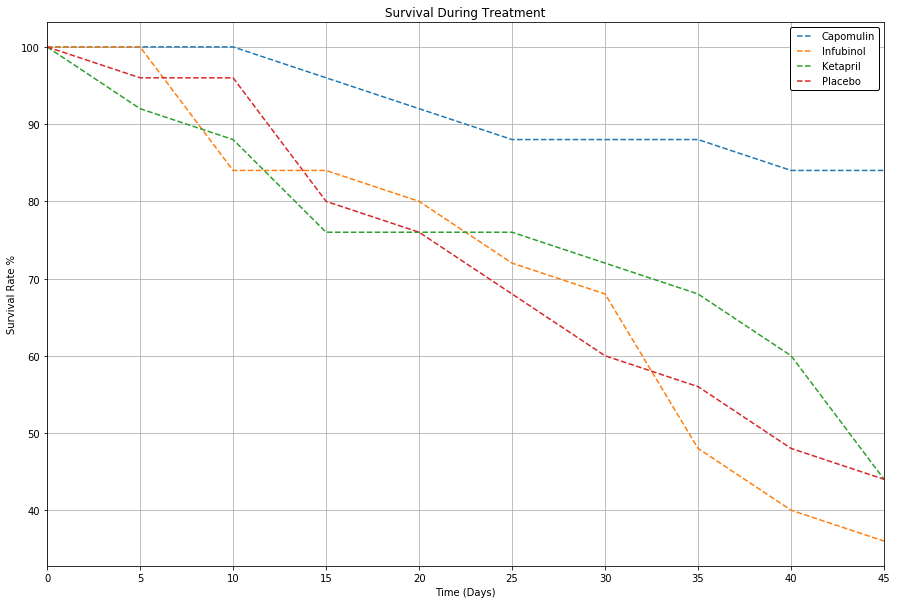

In [13]:
# configure chart
plt.figure(figsize = (15, 10))
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate %')
plt.title('Survival During Treatment')
plt.xlim(0, mice_c_bigfour.index.max())


x = mice_c_bigfour.index

# caculates the survival rate for each x tick. 
counter = 0 
for mice in mice_c_bigfour:
    survival_rate = mice_c_bigfour[mice]/mice_c_bigfour.loc[0,mice]*100
    plt.plot(x, survival_rate, linestyle = '--')

counter += 1

plt.grid()

plt.legend(numpoints = 2, 
          frameon = True,
          edgecolor = 'black', 
          framealpha = 1)

In [14]:
# Summary bar graph for all drugs
drug_all_df = pd.merge(ct_df, mice_df, on="Mouse ID")

avg_change_tumor = pd.DataFrame(drug_all_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
sem_change_tumor = pd.DataFrame(drug_all_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
avg_change_tumor = avg_change_tumor.unstack(level = 0)
avg_change_tumor.columns = avg_change_tumor.columns.get_level_values(1)


change_tumor_summary = (avg_change_tumor.loc[45, :] - avg_change_tumor.loc[0, :])/avg_change_tumor.loc[0, :] * 100
change_tumor_summary

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# summary bar graph for the big four 
change_tumor_bigfour = (avg_tumor.loc[45, :] - avg_tumor.loc[0, :])/avg_tumor.loc[0, :] * 100
change_tumor_bigfour

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

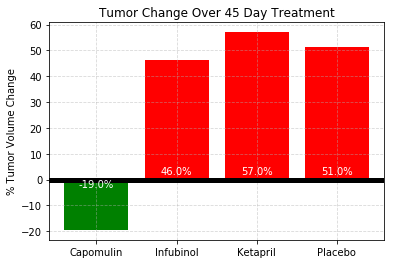

In [16]:
# configure bar graph
plt.title("Tumor Change Over 45 Day Treatment")
# help(plt.axhline)
plt.axhline(y=0, linewidth=5, color='black')
plt.ylabel("% Tumor Volume Change")
xlabels = change_tumor_bigfour.index
plt.xticks(np.arange(len(xlabels)), xlabels)


# help(plt.bar)
plt.bar(np.arange(4), 
        change_tumor_bigfour, 
        color = ['red' if change_tumor_bigfour[g] > 0 else 'green' for g in np.arange(len(xlabels))])
# loop to loop through the change in tumor volume for the big four
counter = 0 

for g in change_tumor_bigfour:
    if g < 0:
        y_coor = -3.0
    else:
        y_coor = 2
    plt.text(counter, y_coor, str(round(g)) + '%', ha = 'center', color = 'white')
    counter += 1
    
plt.grid(linestyle ='--', alpha = 0.5)    
plt.show()
